# **Import Modules and Libraries**

## *python*

In [1]:
import os,sys
import pandas as pd                       

## *custom*

In [2]:
#import customised modules

#define path
sys.path.append(os.path.abspath(os.path.join('..')))

##import relevant modules
try:
    from scripts._05_2_vendor_scorecard import VendorAnalyticsEngine
    
except ImportError:
    print('Could not import module from `scripts/`.')

# **Load Enriched CSV**

In [3]:
# Define path
df_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'enriched_telegram_data.csv')

In [4]:
# Load DataFrame and clean columns
df = pd.read_csv (df_path)

# Clean list-like columns using the static method
df["NER_Products"] = VendorAnalyticsEngine.clean_list_column(df["NER_Products"])
df["NER_Prices"] = VendorAnalyticsEngine.clean_list_column(df["NER_Prices"])

# Print head
df.head()

,Channel Title,Channel Username,ID,Message,Date,Views,NER_Products,NER_Prices
0,አዳማ ገበያ - Adama gebeya,@gebeyaadama,4504,ለመኪናዎ ማጠቢያ አትክልት ለማጠጣት እና ለሌሎችም አገልግሎት የሚሆን ለተ...,2025-06-25 12:02:04+00:00,385,[ኖ],"[ዋጋ, 1200]"
1,አዳማ ገበያ - Adama gebeya,@gebeyaadama,4497,ኪችንዎን በቅጽበት ውብ ማድረግ ይፈልጋሉ ለኪችንዎ ግርማ ሞገስ ሀርቪ ስቲ...,2025-06-21 11:55:50+00:00,1312,"[ር, ስቲ, ሳ, ኩ, ከ, ለ]",[5]
2,አዳማ ገበያ - Adama gebeya,@gebeyaadama,4492,የማያንሸራትት ዋጋ 650ብር 0910500664 0988981322 091176...,2025-06-17 11:33:43+00:00,2062,[nan],[650]
3,አዳማ ገበያ - Adama gebeya,@gebeyaadama,4490,የቆርቆሮ እና የሮቶ መለጠፊያ,2025-06-16 12:50:45+00:00,2077,"[ቆር, ሮ]",[nan]
4,አዳማ ገበያ - Adama gebeya,@gebeyaadama,4489,አንደኛ ደረጃ የጎማ ላስትሮ 5 ሜትር ይረዝማል ማንኛውንም ነገር በከፍተኛ...,2025-06-16 12:50:41+00:00,1909,"[የጎ, ማ, ስት, ፍሳሽ, ፒ, ቱዎችን, ታንከር, ሮ, ዲ, ሜ, ቆር, ዴ...",[nan]


In [5]:
# Group vendors by channel name
vendor_engines = []
vendor_names = []

for name, group in df.groupby("Channel Username"):
    posts = group.to_dict("records")
    engine = VendorAnalyticsEngine(posts)
    vendor_engines.append(engine)
    vendor_names.append(name)



Leaderboard successfully saved to: ..\data\vendor_scorecard.csv

Plot saved to: ..\scorecard plot


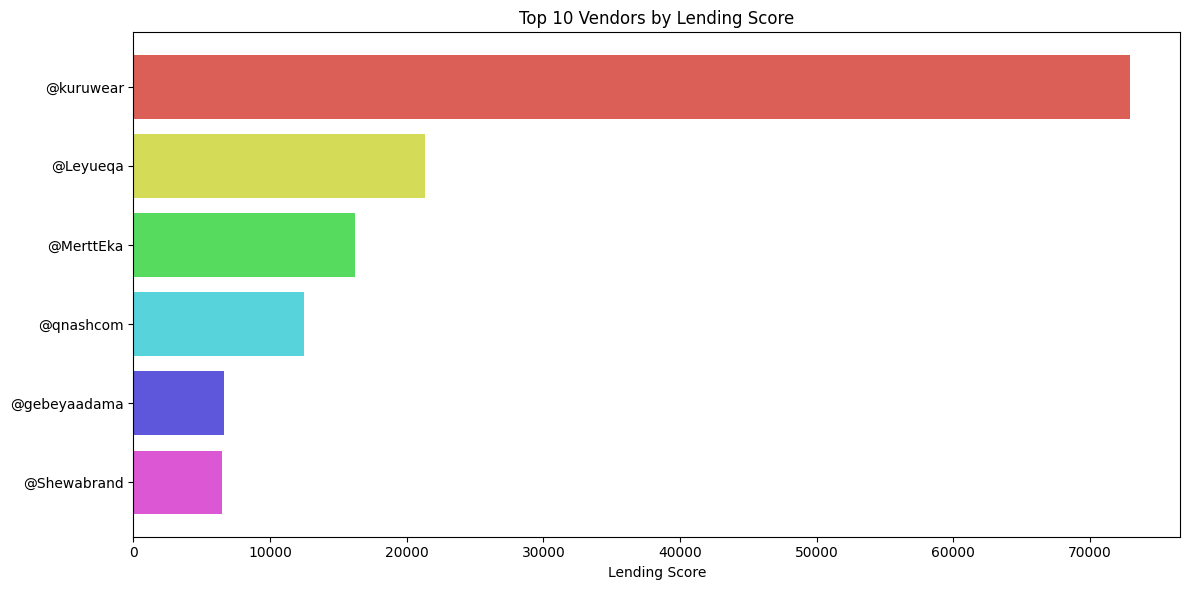

,Vendor,Posts/Week,Avg Views/Post,Avg Price (ETB),Top Product,Top Price,Top Views,Lending Score
0,@kuruwear,3.178082,5485.215517,351028.500000,ጫ,2,13161,72949.261183
1,@Leyueqa,14.253968,42419.268374,707.547717,የንዕ,nan,201645,21355.419921
2,@MerttEka,14.943662,25443.007776,17561.681177,nan,nan,216507,16238.323222
3,@qnashcom,15.099567,24789.553326,422.350567,nan,011,236772,12483.776646
4,@gebeyaadama,9.524017,4019.648785,23181.893534,ቻ,nan,17190,6649.060305
5,@Shewabrand,7.394636,12861.886010,133.437433,nan,nan,114819,6459.848883


In [6]:
# Generate leaderboard

leaderboard = VendorAnalyticsEngine.generate_leaderboard(
    vendor_engines,
    vendor_names=vendor_names,
    visualise=True 
)
display (leaderboard)
